In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
#from KNN.m2 import oklid_uzakligi

# 1 hasta, 0 sağlıklı
data = pd.read_csv("diabetes.csv")
data.head(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


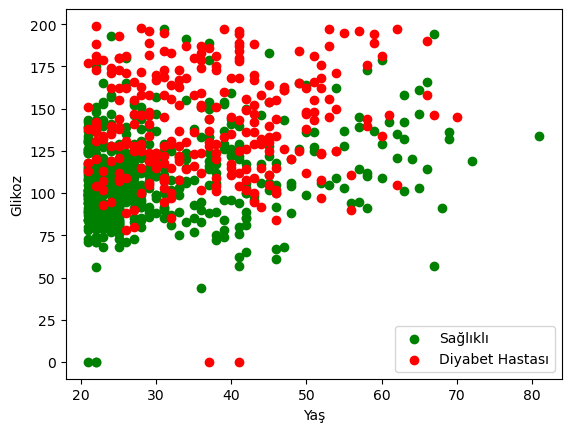

In [4]:
seker_hastalari = data[data.Outcome == 1]
saglikli = data[data.Outcome == 0]

plt.scatter(saglikli.Age, saglikli.Glucose, color="green", label="Sağlıklı")
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="Diyabet Hastası")
plt.xlabel("Yaş")
plt.ylabel("Glikoz")
plt.legend()
plt.show()

In [5]:
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"], axis=1)

# Normalizasyon işlemi:
x = (x_ham_veri - np.min(x_ham_veri)) / (np.max(x_ham_veri) - np.min(x_ham_veri))

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

knn = KNeighborsClassifier(n_neighbors= 3)
knn.fit(x_train, y_train) # Eğitiyoruz
prediction = knn.predict(x_test)
print("k=3 için test verilerinin doğruluk sonucu: ", knn.score(x_test, y_test))

# En iyi k değeri kaç olmalı?

for k in range(1, 10, 1):
    knn_yeni = KNeighborsClassifier(n_neighbors= k)
    knn_yeni.fit(x_train, y_train)
    print(k, " için doğruluk oranı: %", knn_yeni.score(x_test, y_test)*100)

k=3 için test verilerinin doğruluk sonucu:  0.7792207792207793
1  için doğruluk oranı: % 79.22077922077922
2  için doğruluk oranı: % 74.02597402597402
3  için doğruluk oranı: % 77.92207792207793
4  için doğruluk oranı: % 74.02597402597402
5  için doğruluk oranı: % 72.72727272727273
6  için doğruluk oranı: % 75.32467532467533
7  için doğruluk oranı: % 74.02597402597402
8  için doğruluk oranı: % 76.62337662337663
9  için doğruluk oranı: % 76.62337662337663


In [7]:
# Yeni bir hasta tahmini için:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
 
# normalization yapıyoruz - daha hızlı normalization yapabilmek için MinMax  scaler kullandık...
sc = MinMaxScaler()
sc.fit_transform(x_ham_veri)

def visualDoctor(array):
    new_prediction = knn.predict(sc.transform(np.array(array)))
    result = "Sağlıklı"
    if (new_prediction[0] == 1):
        result = "Hasta"
    print("Tahmin:", result)

In [8]:
visualDoctor([[1,189,60,23,846,30.1,0.398,59]]) # Hasta
visualDoctor([[7,196,90,0,0,39.8,0.451,41]]) # Hasta
visualDoctor([[2,141,58,34,128,25.4,0.699,24]]) # Sağlıklı
visualDoctor([[3,120,70,30,135,42.9,0.452,30]]) # Sağlıklı
visualDoctor([[9,57,80,37,0,32.8,0.096,41]]) # Sağlıklı
visualDoctor([[0,127,80,37,210,36.3,0.804,23]]) # Sağlıklı
visualDoctor([[1,87,68,34,77,37.6,0.401,24]]) # Sağlıklı

Tahmin: Sağlıklı
Tahmin: Hasta
Tahmin: Hasta
Tahmin: Hasta
Tahmin: Sağlıklı
Tahmin: Hasta
Tahmin: Hasta
